<h2> Supermarket sales analysis

<h4> Objective 

In this notebook we will be analysing our dataset of supermarket sales to check for correlation between variables and identifying trends. 

<h4> Importing required libraries

In [1]:
# Data manipulation
import pandas as pd 

import numpy as np 

#Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

We imported these third party libraries to tie our code to. These specific libaries are therefore called upon multiple times within our coding assignment to manipulate data within the dataset, as well as provide particular visualisations of it.  

<h4> Importing dataset 

In [2]:
supermarket_sales = pd.read_csv('supermarket_sales - sheet1.csv')

In [3]:
supermarket_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


<h4> Data audit

In [4]:
# First five rows of the dataset 
supermarket_sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Last five rows of the dataset
supermarket_sales.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
# Shape of the dataset 
supermarket_sales.shape

(1000, 17)

We applied this coding to the dataset to find out how many rows and columns are found within it. 

In [7]:
# Checking missing values in the dataset 
supermarket_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We wanted to find if there were any missing values in the dataset, as having such values would have meant that we would have to clean the dataset to enable us to carry on with adequate analysis of it. 

In [8]:
# Columns present in the dataset
supermarket_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

This enables us to clearly see the headings of the columns that are found within the dataset, in order, from left to right. 

In [9]:
# A concise summary of the dataset
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

This summary allows us to see that we have clear variation of type within our dataset. We have qualitative data found in the data type of object, whereas we have quantitative data found in the data type of floats and an immutable value type. It can be seen that the float values will directly depend on the input of the integer in column 7(8), Quantity. 

In [10]:
# Getting descriptive statistics summary 
supermarket_sales.describe 

<bound method NDFrame.describe of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyl

This description gives good detailing for the first 5 rows and last 5 rows of each column. It also gives the specifications of the amount of rows and columns. It is useful as a reference for general facts about the dataset and the inherent features within it. 

<h4> Exploratory data analysis

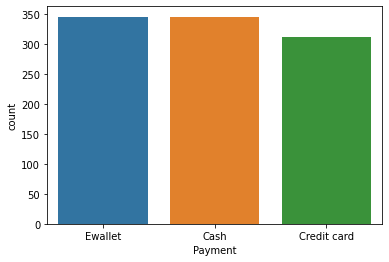

In [11]:
# Plotting frequency of the method of payment
sns.countplot(x='Payment', data=supermarket_sales)
plt.show()

This data visualisation using the seaborn library to create a bar chart, was a method used to clearly illustrate the comparisons that occur within the dataset between the 3 payment methods used. 

In [12]:
# Looking at the total in reference to Product line

Total = Unit price x Quantity

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

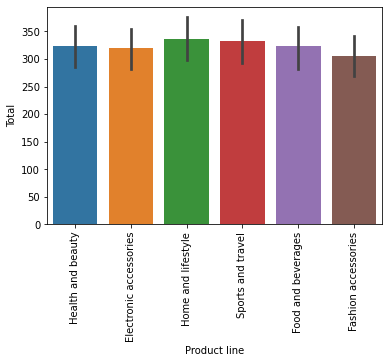

In [13]:
# Finding the mean Total in each of the given Product line
sns.barplot(x="Product line", data=supermarket_sales, y="Total")
plt.xticks(rotation='vertical', size = 10)

The seaborn libary was once again used to give a clear visualisation to the finding that the mean Total within this dataset thus acrued by sales, was relatively close within the variable of Product line. 

In [14]:
# Checking for the Product line minimum and maximum Total
supermarket_sales['Total'].min()

10.6785

In [15]:
supermarket_sales['Total'].max()

1042.65

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Unit price'),
  Text(2, 0, 'Quantity'),
  Text(3, 0, 'Tax 5%'),
  Text(4, 0, 'Total'),
  Text(5, 0, 'cogs'),
  Text(6, 0, 'gross margin percentage'),
  Text(7, 0, 'gross income'),
  Text(8, 0, 'Rating')])

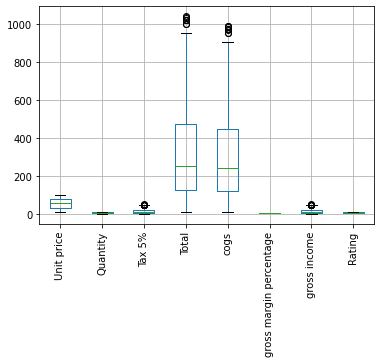

In [16]:
# Boxplot to find out distribution of Total in the data set in comparison to the mean
supermarket_sales.boxplot()
plt.xticks(rotation='vertical', size = 10)

As it is clear that seen in the coding in the above cells, that the range of the dataset in terms of the Total was very large, despite having all of the Product line subcategory means being found to be very close together. We therefore thought it was necessary to use a boxplot to find the distribution of the data around the mean, to identify outliers and see the weighting of the quartiles within the dataset as a whole. It is likely that this data can be used for the targetting of advertisements for example, towards people who fall within the visually seen dispersion surrounding the mean (sd). 

<AxesSubplot:xlabel='Branch', ylabel='Total'>

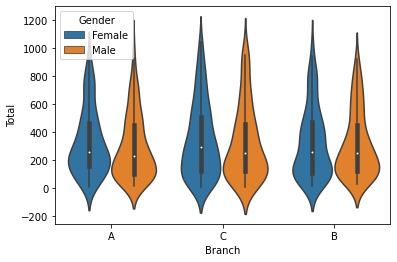

In [17]:
# Finding distribution of Total in purchases by Gender, in each respected Branch
sns.violinplot(x="Branch", y="Total", hue="Gender", data=supermarket_sales)

As per the aforementioned explanation of why the boxplot was used, it was necessary to find out more visual information about the Total values, as if advertisements or alike were to be targetted, it would likely result in needs being different for each particular Gender in each particular category. It could be possible that each Branch could use different advertisement schemes. This violin plot shows the distribution of the variation in Total between the genders across the seperate branches. 

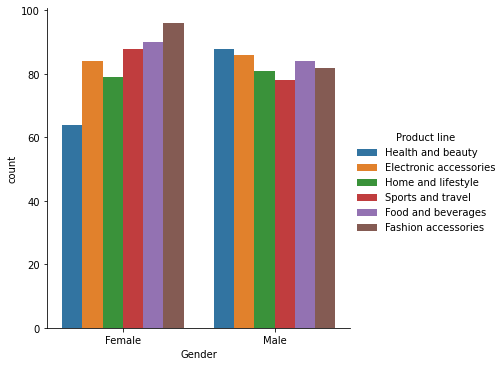

In [18]:
# Finding out the frequency of individual product purchases by Gender in each of the Product lines
sns.catplot(x="Gender", hue="Product line", kind="count", data=supermarket_sales)

Here, we once again use seaborn to find what the distribution of the frequency of individual purchases were made, within the subcategories of Product line, across the particular genders. This would therefore entail more accuracy to the targetting of advertisements, as it could be used in conjunction with the previous violin plot and boxplot, to provide insight not only into the frequency of Total purchase price across the genders, but also what it actually is that these particular genders are purchasing so frequentially.  

In [19]:
#Getting month and time from the dataset 
supermarket_sales['month'] = supermarket_sales['Date']

In [20]:
supermarket_sales['Date']

0      01/05/2019
1      03/08/2019
2      03/03/2019
3       1/27/2019
4      02/08/2019
          ...    
995     1/29/2019
996    03/02/2019
997    02/09/2019
998     2/22/2019
999     2/18/2019
Name: Date, Length: 1000, dtype: object

In [21]:
supermarket_sales['Time']

0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object

In [30]:
# Finding Quantity found in each Product line
supermarket_sales.groupby('Product line').sum()['Quantity']

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

In [31]:
topsales = pd.DataFrame(supermarket_sales.groupby('Product line').sum(['cogs']))

In [32]:
topsales

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1


This is a useful table of results using the pandas libary to show the data totals for each of the Product line subcategories, in a clear manner.

In [33]:
# Sorting cogs column
topsales.sort_values('cogs',ascending='false')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7


The sorting of the cogs values in descending order, allows a good visual respesentation of the comparative basis found within the realm of the other dataset columns. 

In [34]:
# Top 3 sales by Product line
topsales[:3]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7


This sorting coding technique is often useful for sorting through catagories within a dataset to find out their functionality in regards to other data within the same set. Here we have called for the top 3 results as per our predetermation. 

In [22]:
# Finding the total average cost of goods 
np.mean(supermarket_sales['cogs'])

307.58738

The overall mean of Cost of Goods is an important consideration when further analysis of particular means is brought about as a reference for stability comparisons across qualitative compartments within a the dataset object of Product line.  

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

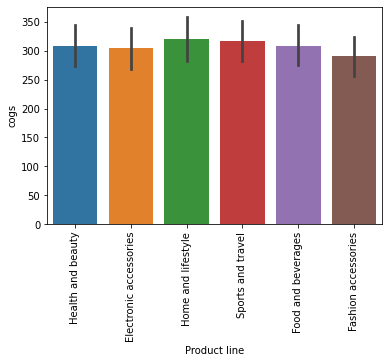

In [23]:
# Finding the average Cost of Goods for each Product Line
sns.barplot(x="Product line", y="cogs", data=supermarket_sales)
plt.xticks(rotation='vertical', size = 10)

We called seaborn here to visualise the trend in our data between cogs and Product line. It can be seen that found within the data is a liklihood for not much variation from the overall mean of 307.59 (2dp) that has been previously calculated from the cogs column. This is important to consider as profits will necessarily often be strongly associated with the cost of goods, whereby a high frequency of purchasing of items with low cost of goods, will often be very beneficial financially for a corporation.   